# Expected Epidemic Size of Mask Model

$P(A_{L, 0}) = f_0(P(A_{L - 1, 0}), P(A_{L - 1, 1}))$

$P(A_{L, 1}) = f_1(P(A_{L - 1, 0}), P(A_{L - 1, 1}))$

$P(\text{wear a mask}) = m$

$A_{L, 0}$ := Node v becomes **active** at level L given he **wear** a mask

$A_{L, 1}$ := Node v becomes **active** at level L given he **doesn't wears** a mask


## 1. Condition on num of neighbors from lower level







$B_k$ := Node v has $k - 1$ lower level neighbors

$P(A_{L, i}) = \sum_{k = 1}^{\infty}{P(A_{L, i} | B_k) * P(B_k)}$

where

$i = 0,1$

$P(B_k) = \frac{k p_{k}}{\langle k\rangle}$




## 2. Condition on num of neighbors wearing a mask

$N$ := Num of neighbors wearing masks 
 
$N \sim \operatorname{Binomial}\left(k - 1, m\right)$


$ P(A_{L, i} | B_k) = \sum_{n = 0}^{k - 1} P(A_{L, i} | B_k, N = n) * \left(\begin{array}{c}
k - 1 \\
n
\end{array}\right) * m^{n} * (1 - m)^{k - 1 - n} $

## 3. Condition on num of active lower level neighbors

$I_0$ := $I_0$ of $k-1$ lower level neighbors active and wear masks

$I_1$ := $I_1$ of $k-1$ lower level neighbors active and don't wear masks

$I_0 \sim \operatorname{Binomial}\left(n, P(A_{L-1,0})\right)$

$I_1 \sim \operatorname{Binomial}\left(k - 1 - n, P(A_{L-1,1})\right)$


$P(A_{L, i} | B_k, N = n) = \sum_{k_0 = 0}^{n}\sum_{k_1 = 0}^{k-1-n}P(A_{L, i} | B_k, N = n, I_0 = k_0, I_1 = k_1) * \left(\begin{array}{c}
n \\
k_0
\end{array}\right) \left(\begin{array}{c}
k - 1 - n \\
k_1
\end{array}\right) * P(A_{L-1, 0})^{k_0} * (1 - P(A_{L-1,0}))^{n - k_0} * P(A_{L-1, 1})^{k_1} * (1 - P(A_{L-1, 1}))^{k - 1 - n - k_1}$

where

$i = 0,1$

## 4. $P(A_{L, i} | B_k, N = n, I_0 = k_0, I_1 = k_1)$

$R$ := $B_k, N = n, I_0 = k_0, I_1 = k_1$

### 4.1 $P(A_{L,0} | R)$

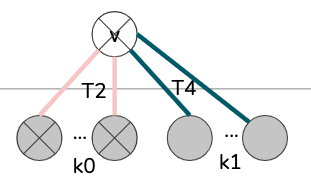

$P(A_{L,0} | R)$

$ = P(\text{At least 1 of node v's active neighbors succssfully infects it, given node v wears a mask} | R)$

$ = 1 - (1 - T_2)^{k_0} * (1 - T_4)^{k_1}$

### 4.1 $P(A_{L,1} | R)$

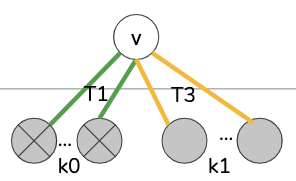

$P(A_{L,1} | R)$

$ = P(\text{At least 1 of node v's active neighbors succssfully infects it, given node v doesn't a mask} | R)$

$ = 1 - (1 - T_1)^{k_0} * (1 - T_3)^{k_1}$

In [1]:
from operator import mul    # or mul=lambda x,y:x*y
from fractions import Fraction
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import poisson
from scipy.special import comb
from scipy import optimize 

In [2]:
def nCk(n,k): 
    return int(round(reduce(mul, (float(n-i)/(i+1) for i in range(k)), 1)))

In [3]:
def generate_degree_list(mean_degree, nodeN):
    degree_max = nodeN - 1
    p_k = dict() # k: degree, v: prob
    for degree in range(1 , degree_max + 1):
        p_k[degree] = poisson.pmf(degree, mean_degree)
        if p_k[degree] < 10 ** (- math.log10(nodeN) - 1): # Stop when the prob < 1/node_num (like a thr)
            break
    return p_k, degree

In [4]:
def generate_new_transmissibilities_mask(T_mask, T, m):
    roundN = 5 # Round T to roundN digits
    T1 = round(T * T_mask * T_mask * m, roundN)
    T2 = round(T * T_mask * (1 - m), roundN)
    T3 = round(T * (1 - m), roundN)
    T4 = round(T * T_mask * m , roundN)

    trans_dict = {'T1': T1,
                  'T2': T2,
                  'T3': T3,
                  'T4': T4}

#     print("T1: %.5f" %T1)
#     print("T2: %.5f" %T2)
#     print("T3: %.5f" %T3)
#     print("T4: %.5f" %T4)
    
    return trans_dict    

def generate_new_transmissibilities_mutation(T_mask, T, m):
    roundN = 5 # Round T to roundN digits
    T1 = round(T * T_mask * T_mask * m, roundN)
    T2 = round(T * T_mask * (1 - m), roundN)
    T3 = round(T * (1 - m), roundN)
    T4 = round(T * T_mask * m , roundN)

    Q1 = T1 * (1 - m) + T2 * m
    Q2 = T3 * (1 - m) + T4 * m

    mu11 = T2 * m / Q1
    mu12 = T1 * (1 - m) / Q1
    mu22 = T3 * (1 - m) / Q2
    mu21 = T4 * m / Q2

    trans_dict = {'T1': T1,
                  'T2': T2,
                  'T3': T3,
                  'T4': T4}
    
    mu_dict = {'mu11': mu11,
               'mu12': mu12,
               'mu22': mu22,
               'mu21': mu21,}

    print("Q1: %.5f" %Q1)
    print("Q2: %.5f" %Q2)
    
    print("T1: %.5f" %T1)
    print("T2: %.5f" %T2)
    print("T3: %.5f" %T3)
    print("T4: %.5f" %T4)

    print("mu11: %.5f" %mu11)
    print("mu12: %.5f" %mu12)
    print("mu22: %.5f" %mu22)
    print("mu21: %.5f" %mu21)
    return trans_dict, mu_dict

In [5]:
def P_A_given_R(i, T_list, k0, k1):
    one_minus_T1 = 1 - T_list[0]
    one_minus_T2 = 1 - T_list[1]
    one_minus_T3 = 1 - T_list[2]
    one_minus_T4 = 1 - T_list[3]
    if i == 0:
        res = 1 - (one_minus_T2 ** k0) * (one_minus_T4 ** k1)
    else:
        res = 1 - (one_minus_T1 ** k0) * (one_minus_T3 ** k1)
    assert res >= 0, "P_A_given_R should be greater than 0"
    assert res <= 1, "P_A_given_R should be less than 1"
    return res

In [6]:
def P_A_given_B_N(i, k, n, T_list, A_0, A_1):
    one_minus_A0 = 1 - A_0
    one_minus_A1 = 1 - A_1
    
    p_abn = 0
    
    for k0 in range(n + 1):
        for k1 in range(k - n):
            p_a_given_r = P_A_given_R(i, T_list, k0, k1)
            p_abn += p_a_given_r * \
                     comb(n, k0) * \
                     comb(k - 1 - n, k1) * \
                     (A_0 ** k0) * \
                     (A_1 ** k1) * \
                     (one_minus_A0 ** (n - k0)) * \
                     (one_minus_A1 ** (k - 1 - n - k1))


#     assert p_ab >= 0, "P_AB should be greater than 0"
#     assert p_ab <= 1, "P_AB should be less than 1"
    return p_abn

In [7]:
def P_A_given_B(i, k, T_list, A_0, A_1, m):
    p_ab = 0
    for n in range(k):
        p_abn = P_A_given_B_N(i, k, n, T_list, A_0, A_1)
        p_ab += p_abn * comb(k - 1, n) * \
                (m ** n) * \
                ((1 - m) ** (k - 1 - n))
    return p_ab

In [8]:
def P_A(i, mean_degree, nodeN, T_list, m, A_0, A_1):
    P_k_dict, k_max = generate_degree_list(mean_degree, nodeN)
    pa_L = 0
    for k in range(1, k_max):
        if k not in P_k_dict.keys():
            p_k = 0
        else:
            p_k = P_k_dict[k]
        p_b = k * p_k / mean_degree
        p_ab = P_A_given_B(i, k, T_list, A_0, A_1, m)
        pa_L += p_ab * p_b
        
#         assert pa_L >= 0, "P_A should be greater than 0"
#         assert pa_L < 1, "P_A should be less than 1"
    return rho + (1 - rho)*pa_L

In [9]:
def p_A_vec(mean_degree, nodeN, T_list, m, A_0, A_1):
    A0 = P_A(0, mean_degree, nodeN, T_list, m, A_0, A_1)
    A1 = P_A(1, mean_degree, nodeN, T_list, m, A_0, A_1)
    return [A0, A1]

def func_fix(A, mean_degree, nodeN, T_list, m):
    return np.array(p_A_vec(mean_degree, nodeN, T_list, m, A[0], A[1]))

def func_root(A, mean_degree, nodeN, T_list, m):
#     return np.array([P_A(0, mean_degree, nodeN, T_list, m, A[0], A[1]) - A[0], 
#                      P_A(1, mean_degree, nodeN, T_list, m, A[0], A[1]) - A[1]])
    return np.array(p_A_vec(mean_degree, nodeN, T_list, m, A[0], A[1])) - np.array(A)

In [10]:
"""
The only change from the orignial jupyter
"""
def get_EpidemicSize(mean_degree, nodeN, T_list, m):
    ### First solve f(q) = q, then do the ieration for the last level(where everything could reach k) ###
    init_A = (0.9, 0.9)

    A_0_1_root = optimize.fsolve(func_root, init_A, args=(mean_degree, nodeN, T_list, m))
    pa_L_0 = 0
    pa_L_1 = 0
    pa_L = 0
    
    for k in range(0, k_max): # k now can start from 0, because for the last level the k could be 0
        p_k = poisson.pmf(k, mean_degree)
        p_ab_0 = 0
        p_ab_1 = 0
        
        for n in range(k + 1): # n can be k
            
            p_abn_0 = 0
            p_abn_1 = 0
            
            for k0 in range(n + 1): 
                for k1 in range(k - n + 1): # k1 can reach k - n
                    p_a_given_r_0 = P_A_given_R(0, T_list, k0, k1)
                    p_a_given_r_1 = P_A_given_R(1, T_list, k0, k1)
                    
                    p_abn_0 += p_a_given_r_0 * \
                             comb(n, k0) * \
                             comb(k - n, k1) * \
                             (A_0_1_root[0] ** k0) * \
                             (A_0_1_root[1] ** k1) * \
                             ((1 - A_0_1_root[0]) ** (n - k0)) * \
                             ((1 - A_0_1_root[1]) ** (k - n - k1))
                    
                    p_abn_1 += p_a_given_r_1 * \
                             comb(n, k0) * \
                             comb(k - n, k1) * \
                             (A_0_1_root[0] ** k0) * \
                             (A_0_1_root[1] ** k1) * \
                             ((1 - A_0_1_root[0]) ** (n - k0)) * \
                             ((1 - A_0_1_root[1]) ** (k - n - k1))
                    
            p_ab_0 += p_abn_0 * comb(k, n) * \
                    (m ** n) * \
                    ((1 - m) ** (k - n))
            p_ab_1 += p_abn_1 * comb(k, n) * \
                    (m ** n) * \
                    ((1 - m) ** (k - n))
            
        pa_L_0 += p_k * p_ab_0
        pa_L_1 += p_k * p_ab_1
        pa_L += p_k * (m * p_ab_0 + (1 - m) * p_ab_1) 
        
    return pa_L_0, pa_L_1, pa_L, 1 - np.array(A_0_1_root)

# Solve equation

 $\begin{cases}
      P(A_0) = f_0(P(A_0), P(A_1)) \\
      P(A_1) = f_1(P(A_0), P(A_1))
    \end{cases}       $

In [11]:
"""
Parameters setup.
"""
T_mask = 0.5 # Impact of the mask
T = 0.6 # Original virus transmissiblity
m = 0.6 # P(people wear mask)
nodeN = 200000

rho = 1/nodeN

dict_M = generate_new_transmissibilities_mask(T_mask, T, m)

T_list = list(generate_new_transmissibilities_mask(T_mask, T, m).values())

mean_degree_list = np.linspace(0, 10, 50)

In [12]:
infection_size = []
infection_size0 = []
infection_size1 = []
k_max = 20
for mean_degree in mean_degree_list:
#     print("Mean degree:", mean_degree)
    A_0_1 = get_EpidemicSize(mean_degree, nodeN, T_list, m)
    infection_size.append(A_0_1[2])
    infection_size0.append(A_0_1[0])
    infection_size1.append(A_0_1[1])

# plt.figure()
# plt.plot(mean_degree_list, infection_size, 'yo')
# plt.xlabel("Mean Degree")
# plt.ylabel("Infection Fraction")
# title = "Theoratical Infection Fraction for Mask Model"
# plt.title(title)



Text(0.5, 1.0, 'Theoratical Infection Fraction for Mask Model')

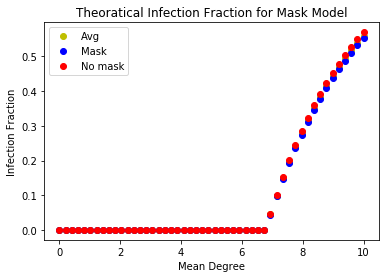

In [13]:
plt.figure()
plt.plot(mean_degree_list, infection_size, 'yo')
plt.plot(mean_degree_list, infection_size0, 'bo')
plt.plot(mean_degree_list, infection_size1, 'ro')

plt.legend(["Avg", "Mask", "No mask"])
plt.xlabel("Mean Degree")
plt.ylabel("Infection Fraction")
title = "Theoratical Infection Fraction for Mask Model"
plt.title(title)